In [3]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
import lsst.afw.fits as afwFits

In [4]:
REPO = '/project/ebellm/fakes/output_ci_fakes'

In [5]:
connection = sqlite3.connect(f'{REPO}/association.db')

In [6]:
pd.read_sql_query('select count(diaSourceId) from DiaSource;', connection)


,count(diaSourceId)
0,878


In [18]:
diaSources = pd.read_sql_query('select * from DiaSource', connection)

In [19]:
diaSources.columns

Index(['diaSourceId', 'ccdVisitId', 'diaObjectId', 'ssObjectId',
       'parentDiaSourceId', 'prv_procOrder', 'ssObjectReassocTime',
       'midPointTai', 'ra', 'raErr',
       ...
       'ixxPSF', 'iyyPSF', 'ixyPSF', 'extendedness', 'spuriousness', 'flags',
       'pixelId', 'filterName', 'filterId', 'isDipole'],
      dtype='object', length=111)

In [8]:
calexpFakes = pd.read_csv(f'{REPO}/calexpFakesTract0.csv')
coaddFakes = pd.read_csv(f'{REPO}/coaddFakesTract0.csv')

In [17]:
calexpFakes.columns

Index(['raJ2000', 'decJ2000', 'DiskHalfLightRadius', 'BulgeHalfLightRadius',
       'gmagVar', 'disk_n', 'bulge_n', 'a_d', 'a_b', 'b_d', 'b_b', 'pa_disk',
       'pa_bluge', 'sourceType'],
      dtype='object')

In [15]:
calexpFakes.head()

,raJ2000,decJ2000,DiskHalfLightRadius,BulgeHalfLightRadius,gmagVar,disk_n,bulge_n,a_d,a_b,b_d,b_b,pa_disk,pa_bluge,sourceType
0,2.712504,-0.066565,1.0,1.0,22.736067,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
1,2.584217,0.048002,1.0,1.0,23.134961,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
2,2.617699,-0.049488,1.0,1.0,20.029752,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
3,2.602154,0.015067,1.0,1.0,21.270084,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
4,2.705561,-0.029968,1.0,1.0,23.036116,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star


In [16]:
coaddFakes.head()

,raJ2000,decJ2000,DiskHalfLightRadius,BulgeHalfLightRadius,gmagVar,disk_n,bulge_n,a_d,a_b,b_d,b_b,pa_disk,pa_bluge,sourceType
0,2.568989,-0.105218,1.0,1.0,22.532091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
1,2.749787,0.001582,1.0,1.0,21.260395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
2,2.667700,-0.053565,1.0,1.0,20.045761,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
3,2.678782,-0.044759,1.0,1.0,21.133314,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
4,2.718293,-0.030607,1.0,1.0,22.048417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star


In [11]:
coaddFakes

,raJ2000,decJ2000,DiskHalfLightRadius,BulgeHalfLightRadius,gmagVar,disk_n,bulge_n,a_d,a_b,b_d,b_b,pa_disk,pa_bluge,sourceType
0,2.568989,-0.105218,1.0,1.0,22.532091,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
1,2.749787,0.001582,1.0,1.0,21.260395,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
2,2.667700,-0.053565,1.0,1.0,20.045761,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
3,2.678782,-0.044759,1.0,1.0,21.133314,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
4,2.718293,-0.030607,1.0,1.0,22.048417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2.662102,0.029747,1.0,1.0,21.602750,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
119996,2.595798,-0.007649,1.0,1.0,23.814219,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
119997,2.712339,-0.052845,1.0,1.0,23.025305,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star
119998,2.706290,-0.037714,1.0,1.0,19.871531,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,star


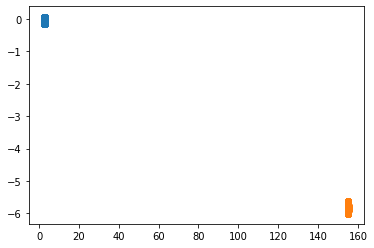

In [23]:
plt.scatter(calexpFakes.raJ2000, calexpFakes.decJ2000)
#plt.scatter(coaddFakes.raJ2000, coaddFakes.decJ2000)

plt.scatter(diaSources.ra, diaSources.decl)

In [24]:
calexpFakes.raJ2000.min()

2.5552538753622662

In [25]:
calexpFakes.raJ2000.max()

2.7829651861268365

In [26]:
diaSources.ra.min()

154.8172588786065

In [27]:
diaSources.ra.max()

155.30530575202073